# Credit Scoring Project

## Installing required libraries

In [1]:
import numpy as np 
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
import category_encoders as ce

In [2]:
data = pd.read_csv("/Users/natasha/Desktop/Ualbany Courses/Fall Sem Courses 2023/CINF 528/Credit Scoring Project - 528/Credit Scoring Project/train.csv" , sep = "," ,na_values =['_','_______','#F%$D@*&8','!@9#%8','nan'])
data.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Data Description

1. ID: An identifier for each record in the dataset.
2. Customer_ID: Identifier for individual customers.
3. Month: The month associated with the data entry.
4. Name: Customer's name.
5. Age: Customer's age.
6. SSN: Social Security Number or some other form of identification.
7. Occupation: Customer's occupation or job title.
8. Annual_Income: Customer's annual income.
9. Monthly_Inhand_Salary: The amount of money the customer receives as salary on a monthly basis.
10. Num_Bank_Accounts: Number of bank accounts the customer has.
11. Num_Credit_Card: Number of credit cards the customer possesses.
12. Interest_Rate: The interest rate associated with some financial aspect (e.g., loans or credit cards).
13. Num_of_Loan: Number of loans the customer has.
14. Type_of_Loan: The type of loan(s) the customer has (e.g., mortgage, personal loan, etc.).
15. Delay_from_due_date: Delay in payments from the due date.
16. Num_of_Delayed_Payment: Number of delayed payments.
17. Changed_Credit_Limit: Indicates if the customer has changed their credit limit.
18. Num_Credit_Inquiries: Number of credit inquiries made by the customer.
19. Credit_Mix: The mix of different types of credit accounts (e.g., credit cards, loans).
20. Outstanding_Debt: The amount of outstanding debt.
21. Credit_Utilization_Ratio: The ratio of credit used to the total credit limit.
22. Credit_History_Age: The age of the customer's credit history.
23. Payment_of_Min_Amount: Payment behavior regarding minimum required payments.
24. Total_EMI_per_month: Total Equated Monthly Installment (EMI) payments made by the customer.
25. Amount_invested_monthly: The amount the customer invests on a monthly basis.
26. Payment_Behaviour: Behavior related to payments, possibly indicating patterns or trends.
27. Monthly_Balance: The customer's monthly balance in their financial accounts.
28. Credit_Score: The credit score associated with the customer's creditworthiness.

In [3]:
#checking the first few rows of data
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
#Checking the number of rows and columns of the data
data.shape

(100000, 28)

In [5]:
#Checking the data types of the data
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:
#Describing the data
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,97909.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,10.389025,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,6.789496,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,-6.490000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,5.320000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,9.400000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,14.870000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,36.970000,2597.000000,50.000000,82331.000000


# Data Preprocessing

### Removing Unwanted columns from the Database

In [7]:
data = data.drop(columns=["ID","Name","SSN"])

In [8]:
data.shape

(100000, 25)

In [9]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


### Changing datatypes

In [10]:
data.dtypes

Customer_ID                  object
Month                        object
Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [11]:
## Month
data["Month"] = pd.to_datetime(data['Month'], format='%B').dt.month

In [12]:
#### Changing to Integer column- Age, Num_of_Loan
#### Changing to Float columns - Num_of_Delayed_Payment, Annual_Income, Outstanding_Debt , Amount_invested_monthly, Monthly_Balance
#### Changing to Binary Columns - Payment_of_Min_Amount

data["Age"] = data["Age"].str.extract("(\d+)").astype(int)

data["Num_of_Loan"] = data["Num_of_Loan"].str.extract("(\d+)").astype(int)

data["Num_of_Delayed_Payment"] = data["Num_of_Delayed_Payment"].str.extract("(\d+)").astype(float)

data["Annual_Income"] = data["Annual_Income"].str.extract(r'(\d+\.\d+)').astype(float)

data["Outstanding_Debt"] = data["Outstanding_Debt"].str.extract(r'(\d+\.\d+)').astype(float)

data["Amount_invested_monthly"] = data["Amount_invested_monthly"].str.extract(r'(\d+\.\d+)').astype(float)

data["Monthly_Balance"] = data["Monthly_Balance"].str.extract(r'(\d+\.\d+)').astype(float)

data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].map( 
                   {'yes':True ,'no':False}) 

data['Payment_of_Min_Amount'] = data['Payment_of_Min_Amount'].astype(bool)

In [13]:
# Label Encoding for Credit_Score column to change it into numerical

columns=[
      'Credit_Score']
for item in columns:
    data[item] = LabelEncoder().fit_transform(data[item])

In [14]:
# Now we will encode the categorical columns:- Occupation,Type_of_Loan,Credit_Mix,Credit_History_Age,Payment_Behaviour
# Leave-One-Out Encoding for Categorical Features
columns = ['Payment_Behaviour','Occupation','Credit_Mix', 'Type_of_Loan']
for item in columns:
    data[item] = ce.LeaveOneOutEncoder().fit_transform(data[item],data['Credit_Score'])

In [15]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23,1.337409,19114.12,1824.843333,3,4,3,4,...,1.350748,809.98,26.822620,22 Years and 1 Months,True,49.574949,80.415295,1.354970,312.494089,0
1,CUS_0xd40,2,23,1.337409,19114.12,NaN,3,4,3,4,...,0.865508,809.98,31.944960,NaN,True,49.574949,118.280222,1.358308,284.629162,0
2,CUS_0xd40,3,500,1.337409,19114.12,NaN,3,4,3,4,...,0.865508,809.98,28.609352,22 Years and 3 Months,True,49.574949,81.699521,1.338167,331.209863,0
3,CUS_0xd40,4,23,1.337409,19114.12,NaN,3,4,3,4,...,0.865508,809.98,31.377862,22 Years and 4 Months,True,49.574949,199.458074,1.385818,223.451310,0
4,CUS_0xd40,5,23,1.337409,19114.12,1824.843333,3,4,3,4,...,0.865508,809.98,24.797347,22 Years and 5 Months,True,49.574949,41.420153,1.345174,341.489231,0


In [16]:
# Convert discrete numeric columns to integer type
discrete_columns = ['Age', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']
for col in discrete_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce', downcast='integer')

# Convert continuous numeric columns to float type
continuous_columns = ['Interest_Rate', 'Delay_from_due_date', 'Monthly_Balance', 'Changed_Credit_Limit', 
                      'Total_EMI_per_month', 'Annual_Income', 'Outstanding_Debt', 'Amount_invested_monthly']
for col in continuous_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce', downcast='float')

In [17]:
# Credit History Age

data['Credit_History_Age'] = data['Credit_History_Age'].fillna('0 Years and 0 Months')
data['Credit_History_Age'] = data['Credit_History_Age'].astype(str)

def convert_to_months(value):
    years = int(re.search(r'(\d+) Years', value).group(1))  # Extract years
    months = int(re.search(r'(\d+) Months', value).group(1))  # Extract months
    return years * 12 + months

data['Credit_History_Age'] = data['Credit_History_Age'].apply(convert_to_months)

In [18]:
# Check the data types
print(data.dtypes)

Customer_ID                  object
Month                         int64
Age                           int16
Occupation                  float64
Annual_Income               float32
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int16
Interest_Rate               float32
Num_of_Loan                   int16
Type_of_Loan                float64
Delay_from_due_date         float32
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float32
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt            float32
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount          bool
Total_EMI_per_month         float32
Amount_invested_monthly     float32
Payment_Behaviour           float64
Monthly_Balance             float32
Credit_Score                  int64
dtype: object


In [19]:
# ## Mean Encoding for Numeric Features
# ##This form of feature transformation designed to capture target-dependent relationships. 
# ##This approach is commonly used when the raw numeric values may not directly capture the predictive relationship with the target.


# columns2 =['Age','Num_Credit_Card','Interest_Rate','Delay_from_due_date','Num_of_Delayed_Payment','Monthly_Balance',
#                            'Num_Credit_Inquiries','Changed_Credit_Limit','Credit_History_Age',
#                            'Total_EMI_per_month', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Amount_invested_monthly']
# for item in columns2:
#     mean_encoding = data.groupby([item])['Credit_Score'].mean()
#     data[item] = data[item].map(mean_encoding)

### Handling the null values

In [20]:
data.isnull().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                    0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              2877
Credit_Score                    0
dtype: int64

In [21]:
## Handle missing values for discrete numerical columns (impute with mode)
discrete_columns = ['Num_of_Delayed_Payment','Num_Credit_Inquiries']
for col in discrete_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [22]:
# Handle missing values for continuous numerical columns (impute with mean)
continuous_columns = ['Monthly_Inhand_Salary','Changed_Credit_Limit','Amount_invested_monthly','Monthly_Balance']
for col in continuous_columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [23]:
data.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [24]:
data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,119.509700,1.353460,1.764144e+05,4194.170850,17.091280,22.47443,72.466042,10.761960,1.353460,...,27.287480,1.353460,1426.207642,32.285173,201.221460,1403.116699,195.562744,1.353460,402.194489,1.353460
std,2.291299,684.757313,0.021857,1.429513e+06,2935.176493,117.404834,129.05741,466.415466,61.789933,0.357756,...,191.298349,0.308455,1155.129639,5.116875,114.320699,8306.647461,190.596924,0.021692,210.547531,0.764913
min,1.000000,14.000000,1.323358,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,0.000000,...,0.000000,0.865426,0.230000,20.000000,0.000000,0.000000,0.000000,1.320481,0.007760,0.000000
25%,2.750000,25.000000,1.340510,1.945750e+04,1792.084167,3.000000,4.00000,8.000000,2.000000,1.169082,...,3.000000,1.350649,566.072510,28.052567,114.000000,30.306660,77.017412,1.338095,271.839531,1.000000
50%,4.500000,34.000000,1.348733,3.757861e+04,3852.736667,6.000000,5.00000,13.000000,3.000000,1.285714,...,5.000000,1.368812,1166.154968,32.305784,208.000000,69.249474,143.127914,1.345174,341.410690,2.000000
75%,6.250000,42.000000,1.367328,7.279092e+04,5371.525000,7.000000,7.00000,20.000000,6.000000,1.478261,...,9.000000,1.672542,1945.962555,36.496663,292.000000,161.224243,220.039055,1.385740,463.502174,2.000000
max,8.000000,8698.000000,1.413494,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,2.000000,...,2597.000000,1.672597,4998.069824,50.000000,404.000000,82331.000000,1977.326050,1.385818,1602.040527,2.000000


## Cleaning for inconsistent values

### Age Column

In [25]:
data['Age'].describe()

count    100000.000000
mean        119.509700
std         684.757313
min          14.000000
25%          25.000000
50%          34.000000
75%          42.000000
max        8698.000000
Name: Age, dtype: float64

#### Looks like there are some random values in the Age column since mean is 119.5 and max is 8698

In [26]:
def clean_age(group):
    min_age = group['Age'].min()
    max_age = group['Age'].max()
    group['Age'] = group['Age'].apply(lambda x: min_age if x < 14 or x > 70 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(clean_age).reset_index(drop=True)

In [27]:
data.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,1,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,...,1.350748,809.97998,26.822620,265,True,49.574947,80.415298,1.354970,312.494080,0
1,CUS_0xd40,2,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,...,0.865508,809.97998,31.944960,0,True,49.574947,118.280220,1.358308,284.629150,0
2,CUS_0xd40,3,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,...,0.865508,809.97998,28.609352,267,True,49.574947,81.699524,1.338167,331.209869,0
3,CUS_0xd40,4,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,...,0.865508,809.97998,31.377862,268,True,49.574947,199.458069,1.385818,223.451309,0
4,CUS_0xd40,5,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,...,0.865508,809.97998,24.797347,269,True,49.574947,41.420155,1.345174,341.489227,0


## Occupation

In [31]:
data['Occupation'].describe()

#No need to change anything with Occupation

count    100000.000000
mean          1.353460
std           0.021857
min           1.323358
25%           1.340510
50%           1.348733
75%           1.367328
max           1.413494
Name: Occupation, dtype: float64

### Annual_Income

In [32]:
data['Annual_Income'].describe()

count    1.000000e+05
mean     1.764144e+05
std      1.429513e+06
min      7.005930e+03
25%      1.945750e+04
50%      3.757861e+04
75%      7.279092e+04
max      2.419806e+07
Name: Annual_Income, dtype: float64

In [33]:
#Looks like the max annual income is at 24 million. Looking at who this belongs to and if this customer occurs multiple times in the data.

max(data['Annual_Income'])

24198062.0

In [34]:
data[data['Annual_Income'] == max(data['Annual_Income'])]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48302,CUS_0xcfc,7,31,1.323673,24198062.0,1135.525417,4,5,5.0,4,...,0.865508,672.48999,34.790192,220,True,46.388947,53.573864,1.358308,283.589722,0


In [35]:
data[data['Customer_ID'] == 'CUS_0xcfc']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
48296,CUS_0xcfc,1,31,1.323673,1.533030e+04,4194.170850,4,5,5.0,4,...,0.865508,672.48999,37.008636,214,True,46.388947,139.367432,1.385818,217.796173,0
48297,CUS_0xcfc,2,31,1.323673,1.533030e+04,1135.525417,4,5,5.0,4,...,0.865508,672.48999,34.865078,215,True,46.388947,69.407043,1.385818,287.756561,0
48298,CUS_0xcfc,3,31,1.323358,1.533030e+04,1135.525417,4,5,5.0,4,...,1.350649,672.48999,32.991519,0,True,46.388947,65.974121,1.385740,291.189484,2
48299,CUS_0xcfc,4,31,1.323673,1.533030e+04,4194.170850,4,5,5.0,4,...,0.865508,672.48999,37.551313,217,True,46.388947,39.631905,1.345174,277.531677,0
48300,CUS_0xcfc,5,31,1.323358,1.533030e+04,1135.525417,715,745,5.0,4,...,0.865426,672.48999,26.381751,218,True,46.388947,195.540009,1.385740,293.661102,2
48301,CUS_0xcfc,6,31,1.323673,1.533030e+04,1135.525417,4,106,5.0,4,...,0.865508,672.48999,31.863006,219,True,46.388947,76.122711,1.385818,281.040894,0
48302,CUS_0xcfc,7,31,1.323673,2.419806e+07,1135.525417,4,5,5.0,4,...,0.865508,672.48999,34.790192,220,True,46.388947,53.573864,1.358308,283.589722,0
48303,CUS_0xcfc,8,31,1.323358,1.533030e+04,1135.525417,4,5,5.0,4,...,0.865426,672.48999,25.389565,221,True,46.388947,118.632187,1.385740,238.531418,2


In [36]:
#It looks like 24198062.0 maybe incorrect for this customer. There could be multiple instances of this which needs to be fixed

def replace_Annual_Income(group):
    min_Annual_Income = group['Annual_Income'].min()
    max_Annual_Income = group['Annual_Income'].max()
    group['Annual_Income'] = group['Annual_Income'].apply(lambda x: min_Annual_Income if  x > 0.2e+06 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Annual_Income).reset_index(drop=True)

In [37]:
data['Annual_Income'].describe()

count    100000.000000
mean      50505.123446
std       38299.422071
min        7005.930176
25%       19342.972168
50%       36999.703125
75%       71683.468750
max      179987.281250
Name: Annual_Income, dtype: float64

### Monthly_Inhand_Salary

In [38]:
data['Monthly_Inhand_Salary'].describe()

# No need to change anything

count    100000.000000
mean       4194.170850
std        2935.176493
min         303.645417
25%        1792.084167
50%        3852.736667
75%        5371.525000
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

### Num_Bank_Accounts

In [39]:
#The Num_Bank_Accounts cannot be negative
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [40]:
#Fixing it

data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].abs()
def replace_Num_Bank_Accounts(group):
    min_Num_Bank_Accounts = group['Num_Bank_Accounts'].min()
    max_Num_Bank_Accounts = group['Num_Bank_Accounts'].max()
    group['Num_Bank_Accounts'] = group['Num_Bank_Accounts'].apply(lambda x: min_Num_Bank_Accounts if x <1 or x > 20 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Bank_Accounts).reset_index(drop=True)

In [41]:
data['Num_Bank_Accounts'].describe()

count    100000.000000
mean          5.368980
std           2.593184
min           0.000000
25%           3.000000
50%           5.000000
75%           7.000000
max          18.000000
Name: Num_Bank_Accounts, dtype: float64

### Num_Credit_Card

In [42]:
data['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [43]:
# A customer cannot have 1499 credit cards, we need to fix this

def replace_Num_Credit_Card(group):
    min_Num_Credit_Card = group['Num_Credit_Card'].min()
    max_Num_Credit_Card = group['Num_Credit_Card'].max()
    group['Num_Credit_Card'] = group['Num_Credit_Card'].apply(lambda x: min_Num_Credit_Card if x <1 or x > 15 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_Credit_Card).reset_index(drop=True)

In [44]:
data['Num_Credit_Card'].describe()

count    100000.000000
mean          5.533600
std           2.067683
min           0.000000
25%           4.000000
50%           5.000000
75%           7.000000
max          15.000000
Name: Num_Credit_Card, dtype: float64

### Interest_Rate

In [45]:
data['Interest_Rate'].describe()

count    100000.000000
mean         72.466042
std         466.415466
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

In [46]:
# No customer can have the interest rate as 5797%, it is impossible, so we need to fix this
def replace_Interest_Rate(group):
    min_Interest_Rate = group['Interest_Rate'].min()
    max_Interest_Rate = group['Interest_Rate'].max()
    group['Interest_Rate'] = group['Interest_Rate'].apply(lambda x: min_Interest_Rate if x < 1 or x > 40 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Interest_Rate).reset_index(drop=True)

In [47]:
data['Interest_Rate'].describe()

count    100000.00000
mean         14.53208
std           8.74133
min           1.00000
25%           7.00000
50%          13.00000
75%          20.00000
max          34.00000
Name: Interest_Rate, dtype: float64

### Num_of_Loan

In [48]:
data['Num_of_Loan'].describe()

count    100000.000000
mean         10.761960
std          61.789933
min           0.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1496.000000
Name: Num_of_Loan, dtype: float64

In [49]:
#The number of loans cannot be in 100s or 1496, its impossible
data[data['Num_of_Loan']>10]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
21,CUS_0x2dbc,6,34,1.323673,143162.640625,12187.220000,1,5,8.0,967,...,0.865508,1303.010010,39.783993,218,True,246.992325,257.808105,1.345174,963.921570,0
31,CUS_0xb891,8,55,1.342945,30689.890625,2612.490833,2,5,4.0,100,...,0.865426,632.460022,27.332515,214,True,16.415451,125.617249,1.354793,379.216370,2
34,CUS_0x1cdb,3,21,1.348733,35547.710938,2853.309167,7,5,5.0,100,...,1.672542,943.859985,23.462303,370,True,0.000000,173.138657,1.338023,392.192261,2
39,CUS_0x1cdb,8,21,1.348733,35547.710938,2853.309167,7,5,5.0,100,...,1.672542,943.859985,25.862922,375,True,0.000000,181.330902,1.354793,364.000031,2
53,CUS_0x284a,6,34,1.371159,131313.406250,4194.170850,0,1,8.0,100,...,0.865426,352.160004,41.980170,372,True,911.220154,86.566391,1.320481,1140.067383,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99901,CUS_0x4986,6,34,1.360572,41329.558594,3421.130000,2,3,7.0,100,...,1.350748,1245.010010,32.846273,284,True,20.553577,272.792511,1.358308,402.162201,0
99902,CUS_0x4986,7,34,1.343269,41329.558594,3421.130000,2,3,7.0,100,...,0.865508,1245.010010,39.011550,285,True,20.553577,462.117645,1.385818,402.162201,0
99919,CUS_0x1619,8,54,1.363505,20059.980469,1523.665000,8,5,12.0,966,...,0.865467,909.010010,32.473773,202,True,45.076828,195.540009,1.385779,402.162201,1
99969,CUS_0xf16,2,45,1.363666,16680.349609,1528.029167,1,1,5.0,100,...,0.865508,897.159973,34.085971,254,True,41.113560,104.646240,1.354970,402.162201,0


In [50]:
#We need to fix this
def replace_Num_of_Loan(group):
    min_Num_of_Loan = group['Num_of_Loan'].min()
    max_Num_of_Loan = group['Num_of_Loan'].max()
    group['Num_of_Loan'] = group['Num_of_Loan'].apply(lambda x: min_Num_of_Loan if x <1 or x > 10 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Loan).reset_index(drop=True)

In [51]:
data['Num_of_Loan'].describe()

count    100000.000000
mean          3.532880
std           2.446356
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max           9.000000
Name: Num_of_Loan, dtype: float64

### Type_of_Loan

In [52]:
data['Type_of_Loan'].describe()

count    100000.000000
mean          1.353460
std           0.357756
min           0.000000
25%           1.169082
50%           1.285714
75%           1.478261
max           2.000000
Name: Type_of_Loan, dtype: float64

In [53]:
# No need to change anything in this.

### Delay_from_due_date

In [54]:
data['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068781
std          14.860253
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [55]:
# Delay_from_due_date cannot be negative, we need to fix this

data['Delay_from_due_date'] = data['Delay_from_due_date'].abs()


def replace_Delay_from_due_date(group):
    min_Delay_from_due_date = group['Delay_from_due_date'].min()  # Find the minimum value in the group
    group['Delay_from_due_date'] = group['Delay_from_due_date'].apply(
        lambda x: min_Delay_from_due_date if x < 1 or x > 20 else x
    )
    return group

data = data.groupby('Customer_ID').apply(replace_Delay_from_due_date).reset_index(drop=True)

In [56]:
data['Delay_from_due_date'].describe()

count    100000.000000
mean         20.030930
std          13.939944
min           0.000000
25%          10.000000
50%          17.000000
75%          26.000000
max          62.000000
Name: Delay_from_due_date, dtype: float64

### Num_of_Delayed_Payment

In [57]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.109790
std         217.993127
min           0.000000
25%           9.000000
50%          15.000000
75%          19.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [58]:
def replace_Num_of_Delayed_Payment(group):
    min_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].min()
    max_Num_of_Delayed_Payment = group['Num_of_Delayed_Payment'].max()
    group['Num_of_Delayed_Payment'] = group['Num_of_Delayed_Payment'].apply(lambda x: min_Num_of_Delayed_Payment if x <1 or x > 30 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Num_of_Delayed_Payment).reset_index(drop=True)

In [59]:
data['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         13.720450
std           6.210633
min           0.000000
25%           9.000000
50%          15.000000
75%          19.000000
max          28.000000
Name: Num_of_Delayed_Payment, dtype: float64

### Changed_Credit_Limit

In [60]:
data['Changed_Credit_Limit'].describe()

count    100000.000000
mean         10.388615
std           6.718129
min          -6.490000
25%           5.420000
50%           9.560000
75%          14.660000
max          36.970001
Name: Changed_Credit_Limit, dtype: float64

In [61]:
## Changed_Credit_Limit cannot be n egative, we need to fix this

data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].abs()

# Define the function to replace out-of-range values
def replace_Changed_Credit_Limit(group):
    min_Changed_Credit_Limit = group['Changed_Credit_Limit'].min()
    max_Changed_Credit_Limit = group['Changed_Credit_Limit'].max()
    group['Changed_Credit_Limit'] = group['Changed_Credit_Limit'].apply(
        lambda x: min_Changed_Credit_Limit if x < 1 else (max_Changed_Credit_Limit if x > 10 else x)
    )
    return group

# Apply the function and reset the index
data = data.groupby('Customer_ID').apply(replace_Changed_Credit_Limit).reset_index(drop=True)

In [62]:
data['Changed_Credit_Limit'].describe()

count    100000.000000
mean         11.475150
std           7.663954
min           0.000000
25%           5.430000
50%           9.560000
75%          17.070000
max          36.970001
Name: Changed_Credit_Limit, dtype: float64

### Num_Credit_Inquiries

In [63]:
data['Num_Credit_Inquiries'].describe() 

count    100000.000000
mean         27.287480
std         191.298349
min           0.000000
25%           3.000000
50%           5.000000
75%           9.000000
max        2597.000000
Name: Num_Credit_Inquiries, dtype: float64

In [64]:
customer_ids = data[(data['Num_Credit_Inquiries'] > 15) ]['Customer_ID'].values

for id in customer_ids:

    mode_v = data[data['Customer_ID'] == id]['Num_Credit_Inquiries'].mode()[0]

    data.loc[(data['Customer_ID'] == id) &
                ((data['Num_Credit_Inquiries'] > 15) ),
                ['Num_Credit_Inquiries']]=mode_v

In [65]:
data['Num_Credit_Inquiries'].describe()

count    100000.000000
mean          5.732770
std           3.804563
min           0.000000
25%           3.000000
50%           5.000000
75%           8.000000
max          17.000000
Name: Num_Credit_Inquiries, dtype: float64

### Credit_Mix

In [66]:
data['Credit_Mix'].describe()

# No need to change anything

count    100000.000000
mean          1.353460
std           0.308455
min           0.865426
25%           1.350649
50%           1.368812
75%           1.672542
max           1.672597
Name: Credit_Mix, dtype: float64

### Outstanding_Debt

In [67]:
data['Outstanding_Debt'].describe()

# No need to change anything

count    100000.000000
mean       1426.207642
std        1155.129639
min           0.230000
25%         566.072510
50%        1166.154968
75%        1945.962555
max        4998.069824
Name: Outstanding_Debt, dtype: float64

### Credit_Utilization_Ratio

In [68]:
data['Credit_Utilization_Ratio'].describe() 

# No need to change anything

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64

### Credit_History_Age

In [69]:
data['Credit_History_Age'].describe()

count    100000.000000
mean        201.221460
std         114.320699
min           0.000000
25%         114.000000
50%         208.000000
75%         292.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

In [70]:
# We just do some scaling for better results
scaler = MinMaxScaler()
data['Credit_History_Age_Scaled'] = scaler.fit_transform(data[['Credit_History_Age']])

In [71]:
data['Credit_History_Age'].describe()

count    100000.000000
mean        201.221460
std         114.320699
min           0.000000
25%         114.000000
50%         208.000000
75%         292.000000
max         404.000000
Name: Credit_History_Age, dtype: float64

### Payment_of_Min_Amount

In [72]:
data['Payment_of_Min_Amount'].describe()

# No need to change anything

count     100000
unique         1
top         True
freq      100000
Name: Payment_of_Min_Amount, dtype: object

### Total_EMI_per_month

In [73]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.116699
std        8306.647461
min           0.000000
25%          30.306660
50%          69.249474
75%         161.224243
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [74]:
def replace_Total_EMI_per_month(group):
    min_Total_EMI_per_month = group['Total_EMI_per_month'].min()
    max_Total_EMI_per_month = group['Total_EMI_per_month'].max()
    group['Total_EMI_per_month'] = group['Total_EMI_per_month'].apply(lambda x: min_Total_EMI_per_month if x <1 or x > 400 else x)
    return group

# Apply the function to the DataFrame using groupby and transform
data = data.groupby('Customer_ID').apply(replace_Total_EMI_per_month).reset_index(drop=True)

In [75]:
data['Total_EMI_per_month'].describe()

count    100000.000000
mean         98.793647
std          98.376351
min           0.000000
25%          28.830799
50%          65.645775
75%         143.185806
max        1042.674194
Name: Total_EMI_per_month, dtype: float64

### Amount_invested_monthly

In [76]:
data['Amount_invested_monthly'].describe()

count    100000.000000
mean        195.562744
std         190.596924
min           0.000000
25%          77.017412
50%         143.127914
75%         220.039055
max        1977.326050
Name: Amount_invested_monthly, dtype: float64

In [77]:
def replace_Amount_invested_monthly(x):
    return (
        min_Amount_invested_monthly if x < 1 else
        (max_Amount_invested_monthly if x > 1000 else x)
    )

data['Amount_invested_monthly'] = data['Amount_invested_monthly'].apply(
    lambda x: 0 if x < 1 else (1000 if x > 1000 else x)
)

In [78]:
data['Amount_invested_monthly'].describe()

count    100000.000000
mean        193.673313
std         180.632336
min           0.000000
25%          77.017412
50%         143.127914
75%         220.039055
max        1000.000000
Name: Amount_invested_monthly, dtype: float64

### Payment_Behaviour

In [79]:
data['Payment_Behaviour'].describe()

count    100000.000000
mean          1.353460
std           0.021692
min           1.320481
25%           1.338095
50%           1.345174
75%           1.385740
max           1.385818
Name: Payment_Behaviour, dtype: float64

In [80]:
# No need to change anything

### Monthly_Balance

In [81]:
data['Monthly_Balance'].describe()

count    100000.000000
mean        402.194489
std         210.547531
min           0.007760
25%         271.839531
50%         341.410690
75%         463.502174
max        1602.040527
Name: Monthly_Balance, dtype: float64

In [82]:
# Dropping the Customer_ID column, since it is not required
data.drop('Customer_ID', axis=1, inplace=True)

### Checking if we have Outliers

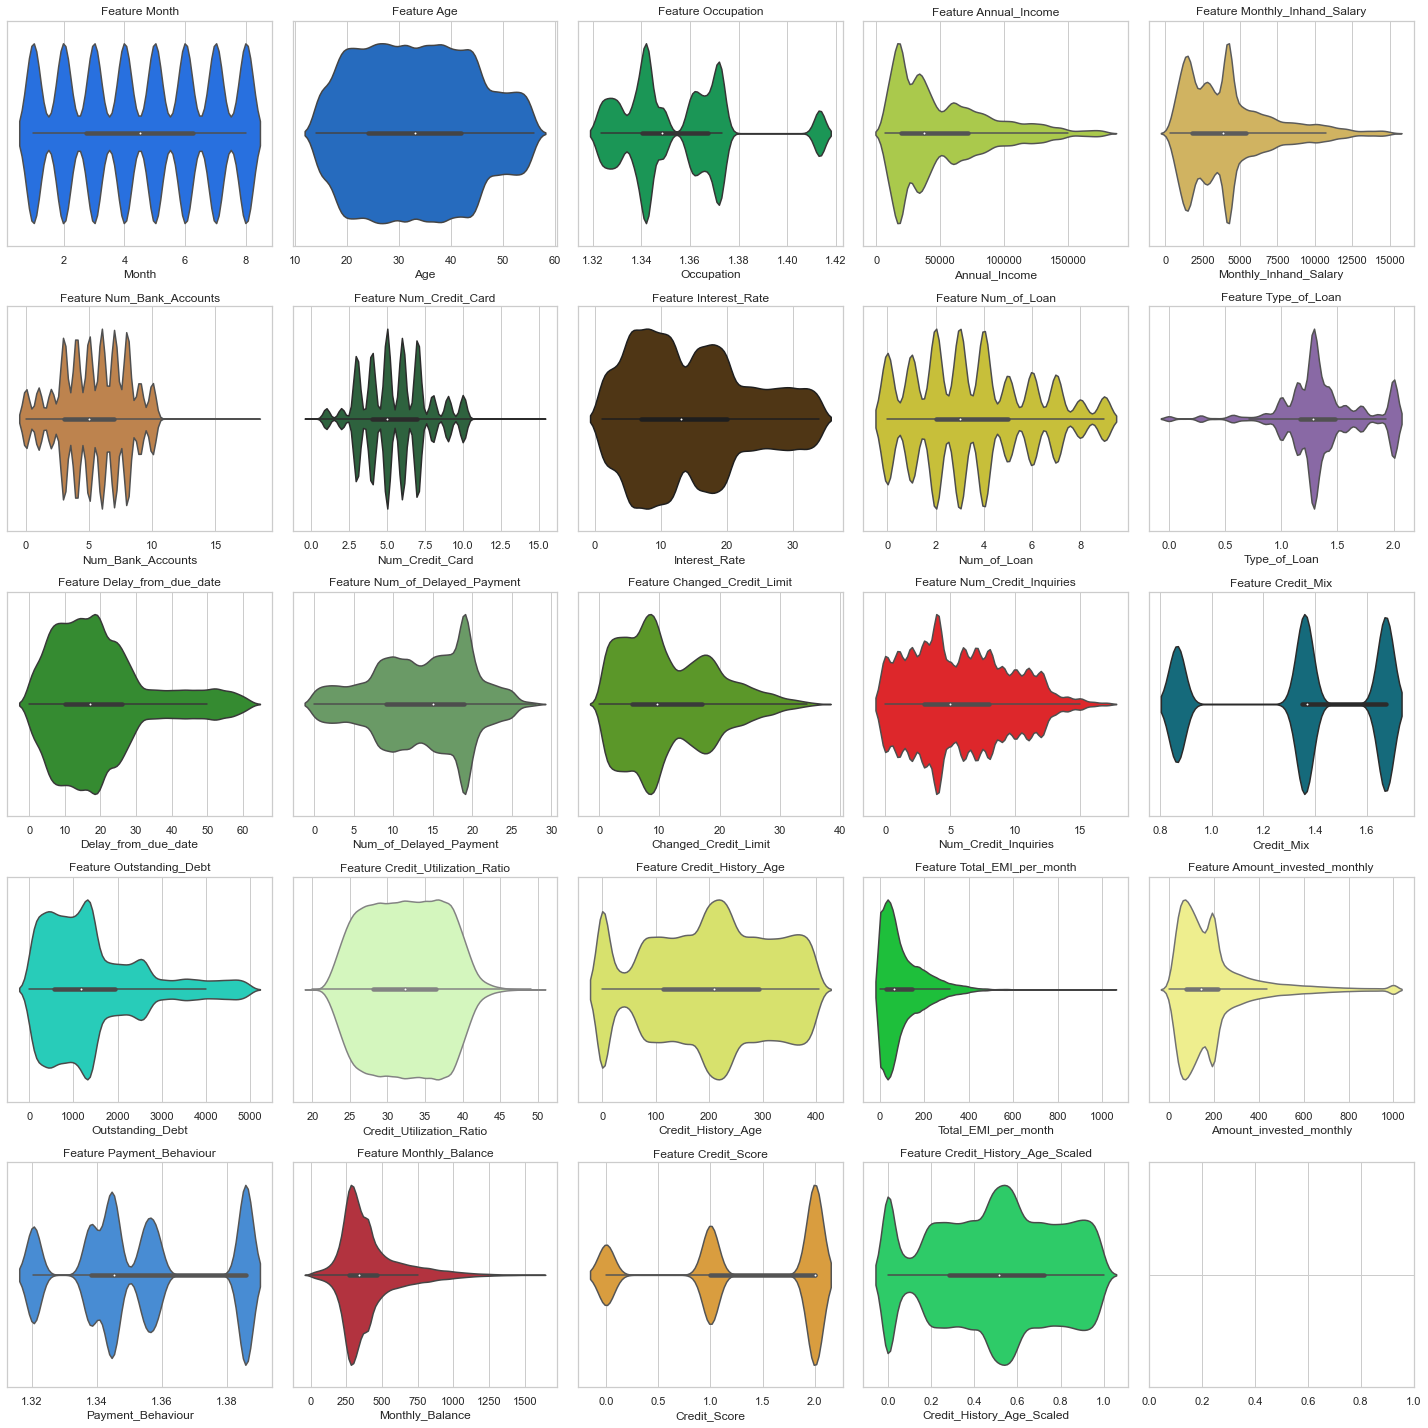

In [83]:
num_vars = data.select_dtypes(include=['number'])
sns.set(style='whitegrid')  
fig, axes = plt.subplots(5, 5, figsize=(20, 20), sharey=True) 

axes = axes.flatten()

for i, feature in enumerate(num_vars.columns):
    sns.violinplot(x=data[feature], ax=axes[i], color=np.random.rand(3,))  
    axes[i].set_title(f'Feature {feature}')  


plt.tight_layout()

plt.show()

In [84]:
data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Scaled
0,1,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.97998,26.822620,265,True,49.574947,80.415298,1.354970,312.494080,0,0.655941
1,2,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.97998,31.944960,0,True,49.574947,118.280220,1.358308,284.629150,0,0.000000
2,3,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.97998,28.609352,267,True,49.574947,81.699524,1.338167,331.209869,0,0.660891
3,4,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.97998,31.377862,268,True,49.574947,199.458069,1.385818,223.451309,0,0.663366
4,5,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.97998,24.797347,269,True,49.574947,41.420155,1.345174,341.489227,0,0.665842


## Visualization

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Age Distribution')

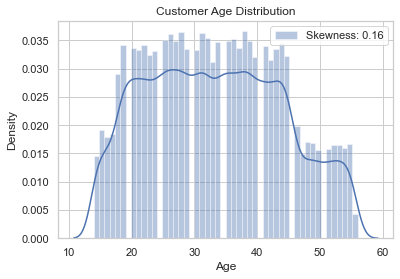

In [85]:
### Understanding the distribution of the column - Age

sns.distplot(data['Age'], label = 'Skewness: %.2f'%(data['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Age Distribution')

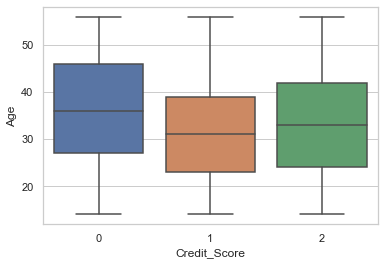

In [86]:
sns.boxplot(x='Credit_Score', y='Age', data=data)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Monthly Salary Distribution')

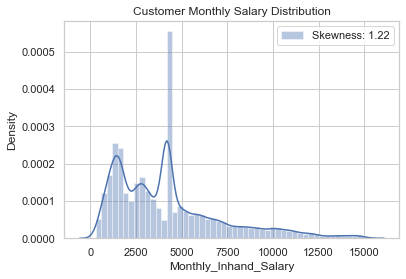

In [87]:
### Understanding the distribution of the column - Monthly_Inhand_Salary

sns.distplot(data['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(data['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

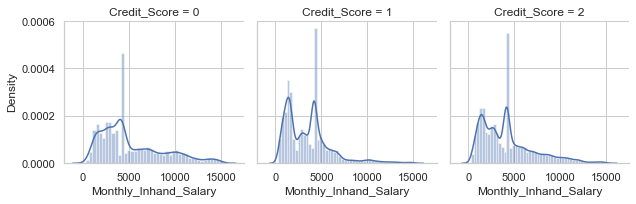

In [88]:
### Monthly Inhand Salary distribution by Credit Score
grid = sns.FacetGrid(data, col = 'Credit_Score')
grid.map(sns.distplot, 'Monthly_Inhand_Salary')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customers Interest Rate Distribution')

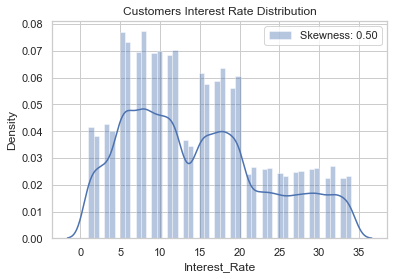

In [89]:
### Understanding the distribution of the column - Interest_Rate

sns.distplot(data['Interest_Rate'], label = 'Skewness: %.2f'%(data['Interest_Rate'].skew()))
plt.legend(loc = 'best')
plt.title('Customers Interest Rate Distribution')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

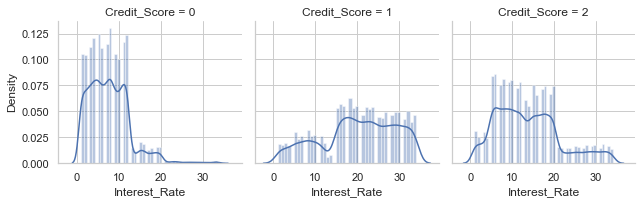

In [90]:
### Interest_Rate distribution by Credit Score
grid = sns.FacetGrid(data, col = 'Credit_Score')
grid.map(sns.distplot, 'Interest_Rate')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customer's Outstanding Debt  Distribution")

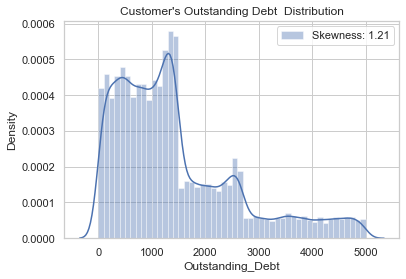

In [91]:
### Understanding the distribution of the column - Outstanding_Debt

sns.distplot(data['Outstanding_Debt'], label = 'Skewness: %.2f'%(data['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

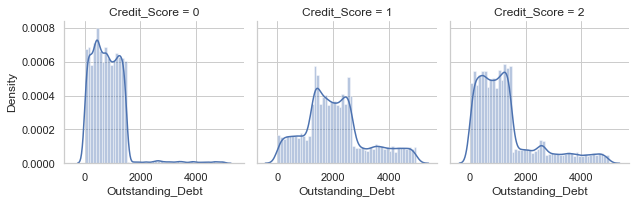

In [92]:
### Outstanding Debt distribution by Credit Score

grid = sns.FacetGrid(data, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')

# Creating a backup of the data

In [94]:
data_backup = data.copy()

In [95]:
data_backup

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Scaled
0,1,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.979980,26.822620,265,True,49.574947,80.415298,1.354970,312.494080,0,0.655941
1,2,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,31.944960,0,True,49.574947,118.280220,1.358308,284.629150,0,0.000000
2,3,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,28.609352,267,True,49.574947,81.699524,1.338167,331.209869,0,0.660891
3,4,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,31.377862,268,True,49.574947,199.458069,1.385818,223.451309,0,0.663366
4,5,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.979980,24.797347,269,True,49.574947,41.420155,1.345174,341.489227,0,0.665842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,34.663572,378,True,35.104023,60.971333,1.320554,402.162201,1,0.935644
99996,5,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,40.565631,379,True,35.104023,54.185951,1.345117,402.162201,1,0.938119
99997,6,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,41.255522,380,True,35.104023,24.028477,1.320554,402.162201,1,0.940594
99998,7,25,1.372973,39628.988281,3359.415833,4,6,7.0,2,1.213836,...,502.380005,33.638208,381,True,35.104023,251.672577,1.358116,402.162201,2,0.943069


In [96]:
data = data_backup.copy()

In [97]:
data

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Scaled
0,1,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.979980,26.822620,265,True,49.574947,80.415298,1.354970,312.494080,0,0.655941
1,2,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,31.944960,0,True,49.574947,118.280220,1.358308,284.629150,0,0.000000
2,3,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,28.609352,267,True,49.574947,81.699524,1.338167,331.209869,0,0.660891
3,4,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,809.979980,31.377862,268,True,49.574947,199.458069,1.385818,223.451309,0,0.663366
4,5,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,809.979980,24.797347,269,True,49.574947,41.420155,1.345174,341.489227,0,0.665842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,34.663572,378,True,35.104023,60.971333,1.320554,402.162201,1,0.935644
99996,5,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,40.565631,379,True,35.104023,54.185951,1.345117,402.162201,1,0.938119
99997,6,25,1.373132,39628.988281,3359.415833,4,6,7.0,2,1.220126,...,502.380005,41.255522,380,True,35.104023,24.028477,1.320554,402.162201,1,0.940594
99998,7,25,1.372973,39628.988281,3359.415833,4,6,7.0,2,1.213836,...,502.380005,33.638208,381,True,35.104023,251.672577,1.358116,402.162201,2,0.943069


# Splitting the data into X and y

In [98]:
X = data.drop("Credit_Score", axis=1)  # Select all columns except the target column

y = data["Credit_Score"]  # Select the target column

In [99]:
X.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Scaled
0,1,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,1.350748,809.97998,26.822620,265,True,49.574947,80.415298,1.354970,312.494080,0.655941
1,2,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,0.865508,809.97998,31.944960,0,True,49.574947,118.280220,1.358308,284.629150,0.000000
2,3,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,0.865508,809.97998,28.609352,267,True,49.574947,81.699524,1.338167,331.209869,0.660891
3,4,23,1.337409,19114.119141,4194.170850,3,4,3.0,4,0.285714,...,0.865508,809.97998,31.377862,268,True,49.574947,199.458069,1.385818,223.451309,0.663366
4,5,23,1.337409,19114.119141,1824.843333,3,4,3.0,4,0.285714,...,0.865508,809.97998,24.797347,269,True,49.574947,41.420155,1.345174,341.489227,0.665842


## Modelling

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

#Splitting the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [101]:
# Creating the empty lists to store the final results of the models

model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
auc_scores = []
specificity_scores = []

def cross_validation(X, y, model):
    scores = cross_val_score(model, X, y, cv=5)
    return (scores.mean(), scores.std() * 2)

def score_calculator(X_train,y_train,X_test,y_test,model):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    print(classification_report(y_test,y_pred_test))
    precision = precision_score(y_test,y_pred_test,average='micro')
    recall = recall_score(y_test,y_pred_test,average='micro')
    specificity = recall_score(y_test, y_pred_test, average='micro', pos_label=0)
    f1 = f1_score(y_test,y_pred_test,average='micro')
    y_pred_prob_test = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_prob_test, average='macro', multi_class='ovr')
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test)
    plt.show()
    return (y_pred_test, test_acc, precision, recall, auc, f1, specificity)



## Linear Discriminant Analysis Model

In [102]:
#### First we need to perform CV on the solver parameter in LinearDiscriminantAnalysis Model

solvers = ['svd', 'lsqr']
for solver in solvers:
    mean_acc, std_acc = cross_validation(X_train, y_train, LinearDiscriminantAnalysis(solver=solver))
    print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

#The accuracy score for both the models is the same so we can use either of them. Taking solver as lsqr lets perform prediction

Accuracy: 0.695 (+/- 0.005)
Accuracy: 0.695 (+/- 0.005)


Accuracy: 0.695 (+/- 0.005)
              precision    recall  f1-score   support

           0       0.54      0.66      0.60      5866
           1       0.73      0.63      0.68      9633
           2       0.75      0.74      0.75     17501

    accuracy                           0.70     33000
   macro avg       0.67      0.68      0.67     33000
weighted avg       0.70      0.70      0.70     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


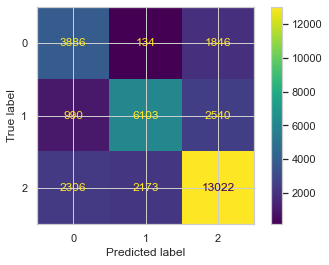

In [103]:
# Perform cross-validation on the LDA model with chosen solver
mean_acc, std_acc = cross_validation(X_train, y_train, LinearDiscriminantAnalysis(solver="lsqr"))
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train, y_train, X_test, y_test, LinearDiscriminantAnalysis(solver="lsqr"))
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('LinearDiscriminantAnalysis')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## GaussianNB Model

Accuracy: 0.602 (+/- 0.006)
              precision    recall  f1-score   support

           0       0.40      0.81      0.54      5866
           1       0.63      0.72      0.67      9633
           2       0.79      0.46      0.59     17501

    accuracy                           0.60     33000
   macro avg       0.61      0.66      0.60     33000
weighted avg       0.68      0.60      0.60     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


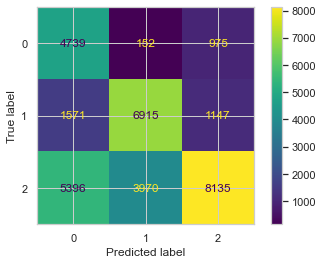

In [104]:
# Perform cross-validation on the GaussianNB model
mean_acc, std_acc = cross_validation(X_train, y_train, GaussianNB())
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train,y_train,X_test,y_test,GaussianNB())
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('GaussianNB')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Decision Tree Model

Max Depth: 1.0 /nAccuracy: 0.606 (+/- 0.006)
Max Depth: 2.0 /nAccuracy: 0.666 (+/- 0.028)
Max Depth: 3.0 /nAccuracy: 0.778 (+/- 0.041)
Max Depth: 4.0 /nAccuracy: 0.898 (+/- 0.029)
Max Depth: 5.0 /nAccuracy: 0.966 (+/- 0.002)
Max Depth: 6.0 /nAccuracy: 0.985 (+/- 0.001)
Max Depth: 7.0 /nAccuracy: 0.997 (+/- 0.001)
Max Depth: 8.0 /nAccuracy: 1.000 (+/- 0.000)
Max Depth: 9.0 /nAccuracy: 1.000 (+/- 0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


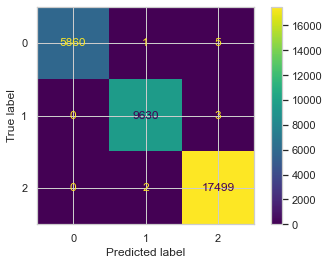

In [105]:
#### First we need to perform CV on the max_depth parameter in Decision Tree Model

max_depths = range(1,10)
for max_depth in max_depths:
    mean_acc, std_acc = cross_validation(X_train, y_train, tree.DecisionTreeClassifier(max_depth=max_depth))
    print("Max Depth: %0.1f /nAccuracy: %0.3f (+/- %0.3f)" % (max_depth, mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train,y_train,X_test,y_test,tree.DecisionTreeClassifier())
# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('DecisionTreeClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Logistic Regression

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      5866
           1       0.74      0.61      0.67      9633
           2       0.72      0.80      0.75     17501

    accuracy                           0.70     33000
   macro avg       0.68      0.66      0.67     33000
weighted avg       0.70      0.70      0.70     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


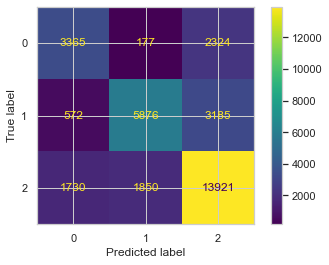

In [106]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

mean_acc, std_acc = cross_validation(X_train_scaled, y_train, LogisticRegression(multi_class='multinomial'))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled, y_train, X_test_scaled, y_test, LogisticRegression(max_iter=200, multi_class='multinomial'))

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('LogisticRegression')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## K-Nearest Neighbour (k-NN)

Accuracy: 0.729 (+/- 0.004)
              precision    recall  f1-score   support

           0       0.60      0.67      0.63      5866
           1       0.73      0.74      0.74      9633
           2       0.79      0.76      0.77     17501

    accuracy                           0.74     33000
   macro avg       0.71      0.72      0.71     33000
weighted avg       0.74      0.74      0.74     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


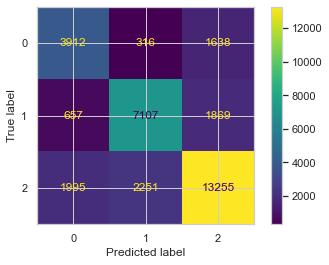

In [107]:
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, KNeighborsClassifier(n_neighbors=5))
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled, y_train, X_test_scaled, y_test, KNeighborsClassifier(n_neighbors=5))

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('KNeighborsClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Artificial Neural Networks (ANN)

Accuracy: 0.736 (+/- 0.006)
              precision    recall  f1-score   support

           0       0.62      0.57      0.60      5866
           1       0.76      0.72      0.74      9633
           2       0.75      0.79      0.77     17501

    accuracy                           0.73     33000
   macro avg       0.71      0.70      0.70     33000
weighted avg       0.73      0.73      0.73     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


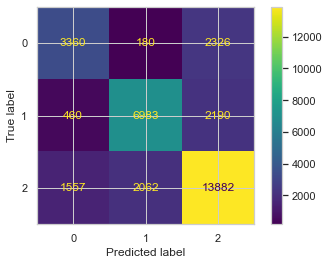

In [108]:
model = MLPClassifier(hidden_layer_sizes=(100, ), learning_rate_init=0.001,alpha=1, momentum=0.9,max_iter=1000)
mean_acc, std_acc = cross_validation(X_train_scaled, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train_scaled, y_train, X_test_scaled, y_test, model)

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('MLPClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Random Forest

Accuracy: 0.997 (+/- 0.001)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


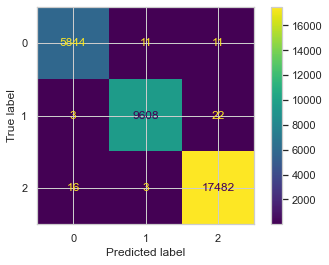

In [109]:
# Perform cross-validation on the Random Forest model
mean_acc, std_acc = cross_validation(X_train, y_train, RandomForestClassifier(n_estimators=200))
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train, y_train, X_test, y_test, RandomForestClassifier(n_estimators=200))

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('RandomForestClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## XGBoost

Accuracy: 1.000 (+/- 0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


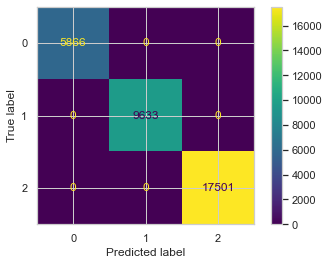

In [110]:
# Perform cross-validation on the XGB model
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
mean_acc, std_acc = cross_validation(X_train, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

# Evaluate the model on the test set using the same C parameter used in cross-validation
y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train, y_train, X_test, y_test, model)

# Append the results to the lists
model_names.append('XGB')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Bagging Classifier

Accuracy: 1.000 (+/- 0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


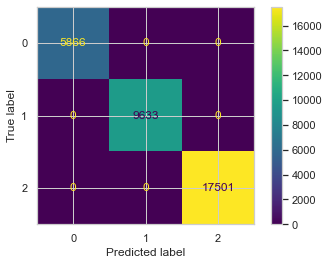

In [111]:
# Perform cross-validation on the BaggingClassifier
model = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)

mean_acc, std_acc = cross_validation(X_train, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train, y_train, X_test, y_test, model)

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('BaggingClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)


## AdaBoostClassifier

Accuracy: 1.000 (+/- 0.000)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5866
           1       1.00      1.00      1.00      9633
           2       1.00      1.00      1.00     17501

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1583: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


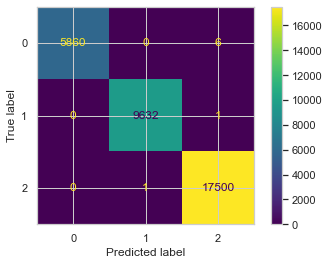

In [112]:
# Perform cross-validation on the AdaBoostClassifier
model = AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=10, algorithm='SAMME', learning_rate=0.5)

mean_acc, std_acc = cross_validation(X_train, y_train, model)
print("Accuracy: %0.3f (+/- %0.3f)" % (mean_acc, std_acc))

y_pred_test, accuracy, precision, recall, auc, f1, specificity = score_calculator(X_train, y_train, X_test, y_test, model)

# print("Accuracy: %0.3f \nPrecision: %0.3f \nRecall: %0.3f \nf1_score: %0.3f \nspecificity: %0.3f \nAuc: %0.3f" % (accuracy, precision, recall, f1, specificity, auc))
model_names.append('AdaBoostClassifier')
accuracy_scores.append(accuracy)
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)
specificity_scores.append(specificity)
auc_scores.append(auc)

## Result

In [115]:
model_report = pd.DataFrame({'model_names': model_names, 'accuracy_scores': accuracy_scores, 'precision_scores': precision_scores, 'recall_scores': recall_scores, 'f1_scores':recall_scores, 'specificity_scores': specificity_scores, 'auc_scores': auc_scores})

In [116]:
model_report.to_csv('model_report.csv')